This cell imports necessary libraries (`pandas`, `glob`, `os`) and then identifies all CSV files in the current directory (or a specified directory). It reads each CSV file into a pandas DataFrame and then concatenates all DataFrames into a single DataFrame called `df_all`. Finally, it prints the shape of the combined DataFrame and displays its first 5 rows.

In [ ]:
import pandas as pd
import glob
import os

# Lister tous les fichiers CSV dans le répertoire courant
csv_files = glob.glob("*.csv")

# (Optionnel) — Si tes fichiers sont dans un dossier précis :
# csv_files = glob.glob("/content/mon_dossier/*.csv")

print("Fichiers trouvés :", csv_files)

dfs = [pd.read_csv(f, encoding="utf-8") for f in csv_files]

df_all = pd.concat(dfs, ignore_index=True)
print(df_all.shape)
df_all.head()


Fichiers trouvés : ['IND_race_2 (1).csv', 'IND_race_1 (1).csv', 'COTA_race_1 (1).csv', 'BARBER_race_1 (1).csv', 'COTA_race_2 (1).csv', 'SON_race_1 (1).csv', 'RA_race_1.csv', 'RA_race_2.csv', 'SEB_race_2 (1).csv', 'BARBER_race_2 (1).csv', 'SEB_race_1 (1).csv']
(4986, 78)


,vehicle_number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,pbrake_r,speed,incident,best_lap_time,loss_per_lap,ath,int-1_time,int-1_elapsed,int-2_time,int-2_elapsed
0,2,1,1,0 days 00:01:52.476000,0,NaN,38.431,0,40.412,0,...,2.499473,86.550548,0.0,0 days 00:01:41.003000,11.473,NaN,NaN,NaN,NaN,NaN
1,2,1,2,0 days 00:02:04.809000,0,NaN,35.068,0,40.306,0,...,3.118171,93.533951,0.0,0 days 00:01:41.003000,23.806,NaN,NaN,NaN,NaN,NaN
2,2,1,3,0 days 00:02:13.716000,0,NaN,50.630,0,41.998,0,...,5.059603,123.409228,1.0,0 days 00:01:41.003000,32.713,NaN,NaN,NaN,NaN,NaN
3,2,1,4,0 days 00:01:43.847000,0,NaN,35.789,0,34.448,0,...,3.450250,113.729261,0.0,0 days 00:01:41.003000,2.844,NaN,NaN,NaN,NaN,NaN
4,2,1,5,0 days 00:01:42.299000,0,NaN,35.346,0,34.178,0,...,2.420892,105.783729,0.0,0 days 00:01:41.003000,1.296,NaN,NaN,NaN,NaN,NaN


This cell filters the `df_all` DataFrame to keep only the rows where the 'incident' column has `NaN` (Not a Number) values. This effectively creates a new DataFrame `df_no_incident` containing only data points where no incident was recorded.

In [ ]:
# Garder uniquement les lignes où incident est NaN
df_no_incident = df_all[df_all["incident"].isna()]


This cell extracts the unique `vehicle_number` values from the `df_no_incident` DataFrame (which contains data without incidents) and prints them. This shows the vehicle numbers that did not experience any incidents in the recorded data.

In [ ]:
vehicles_with_incident = df_no_incident["vehicle_number"].unique()
print(vehicles_with_incident)


[  7  71   2   3   5  13  18  21  47  55  72  80  98 113  46  78  93   8
  11  12  15  31  41  57  86  88  89]


This cell converts the 'lap_time' column in `df_all` to a timedelta object using `pd.to_timedelta`. The `errors='coerce'` argument will turn any unparseable values into `NaT` (Not a Time). After conversion, it converts these timedelta objects into total seconds (float) for numerical analysis.

In [ ]:
df_all["lap_time"] = pd.to_timedelta(df_all["lap_time"], errors="coerce")

# Conversion en secondes (float)
df_all["lap_time"] = df_all["lap_time"].dt.total_seconds()

This cell simply displays all the column names present in the `df_all` DataFrame, which is useful for understanding the available features.

In [ ]:
df_all.columns

Index(['vehicle_number', 'driver_number', 'lap_number', 'lap_time',
       'lap_improvement', 'crossing_finish_line_in_pit', 's1',
       's1_improvement', 's2', 's2_improvement', 's3', 's3_improvement', 'kph',
       'elapsed', 'hour', 's1_large', 's2_large', 's3_large', 'top_speed',
       'driver_name', 'pit_time', 'class', 'group', 'team', 'manufacturer',
       'flag_at_fl', 's1_seconds', 's2_seconds', 's3_seconds', 'im1a_time',
       'im1a_elapsed', 'im1_time', 'im1_elapsed', 'im2a_time', 'im2a_elapsed',
       'im2_time', 'im2_elapsed', 'im3a_time', 'im3a_elapsed', 'fl_time',
       'fl_elapsed', 'unnamed: 41', 'tyre_age', 'elapsed_seconds',
       'TIME_UTC_SECOND', 'TIME_UTC_SECONDS', 'TIME_UTC_STR', 'AIR_TEMP',
       'TRACK_TEMP', 'HUMIDITY', 'PRESSURE', 'WIND_SPEED', 'WIND_DIRECTION',
       'RAIN', 'Unnamed: 9', 'lap_time_seconds', 'START_UTC_SECONDS', 'lap',
       'Laptrigger_lapdist_dls', 'Steering_Angle', 'VBOX_Lat_Min',
       'VBOX_Long_Minutes', 'accx_can', 'accy_c

This cell calculates the 99th percentile of the 'loss_per_lap' column in `df_all`. It then filters the `df_all` DataFrame, keeping only the rows where 'loss_per_lap' is less than or equal to this 99th percentile. This step helps to remove extreme outliers in the 'loss_per_lap' feature.

In [ ]:
q99 = df_all['loss_per_lap'].quantile(0.99)
df_all = df_all[df_all['loss_per_lap'] <= q99]


This cell defines the features (input variables) and the target variable for a machine learning model. `features` is a list of column names to be used as predictors, and `target` is 'loss_per_lap'. It then creates `X` (features DataFrame) and `y` (target Series) from `df_all`.

In [ ]:
features = ["lap_number",'lap_time' ,"accx_can","Steering_Angle", "accy_can", "pbrake_f", "pbrake_r", "tyre_age"]
target = "loss_per_lap"
X = df_all[features]
y = df_all[target]


This cell imports `StandardScaler` from `sklearn.preprocessing`. It initializes a scaler object and then applies it to `X` (the features DataFrame) to standardize the data. Standardization scales the data so that it has a mean of 0 and a standard deviation of 1, which is often beneficial for machine learning models. The scaled features are then converted back into a pandas DataFrame.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=features)

This cell calculates and prints the maximum value of the 'loss_per_lap' column in the `df_all` DataFrame, giving an idea of the upper bound of this metric after outlier removal.

In [ ]:
df_all['loss_per_lap'].max()

96.538

This cell sets up and trains an XGBoost Regressor model. It imports necessary libraries, splits the data into training and testing sets, initializes an `XGBRegressor` with specific hyperparameters, trains the model on the training data, makes predictions on the test data, and finally calculates and prints the Mean Absolute Error (MAE) of the predictions.

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 1.8691994793961721


This cell generates a histogram of the 'loss_per_lap' column from `df_all`. It uses `matplotlib.pyplot` to visualize the distribution of 'loss_per_lap', providing insights into its frequency and range.

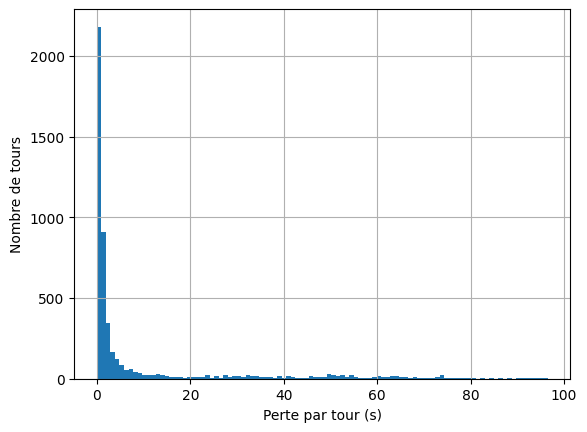

In [ ]:
import matplotlib.pyplot as plt

df_all['loss_per_lap'].hist(bins=100)
plt.xlabel("Perte par tour (s)")
plt.ylabel("Nombre de tours")
plt.show()


This cell trains a RandomForestRegressor model. It imports `train_test_split`, `RandomForestRegressor`, `mean_absolute_error`, and `r2_score`. It splits the data into training and test sets, initializes and trains a `RandomForestRegressor` model, makes predictions, and then calculates and prints the Mean Absolute Error (MAE) and R-squared (R²) score to evaluate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")


MAE: 1.478
R²: 0.931


This cell imports the `joblib` library, which is used for saving and loading Python objects, especially machine learning models.

In [ ]:
import joblib

This cell saves the trained `RandomForestRegressor` model (stored in the `model` variable) to a file named 'model1.pkl' using `joblib.dump()`. After saving, it initiates a download of this file to your local machine using `files.download()` from `google.colab`.

In [ ]:
joblib.dump(model, "model1.pkl")

['model1.pkl']

In [ ]:
from google.colab import files
files.download("model1.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This cell saves the `StandardScaler` object (stored in the `scaler` variable) to a file named 'scaler_model1.pkl' using `joblib.dump()`. This scaler is important for preprocessing new data before making predictions with the saved model. After saving, it initiates a download of this file to your local machine using `files.download()` from `google.colab`.

In [ ]:
joblib.dump(scaler, "scaler_model1.pkl")
from google.colab import files
files.download("scaler_model1.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>